In [1]:
import pandas as pd
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
path = './osfstorage-archive/Experiment 1/twostep_data_study1/'
paths = [path + x for x in os.listdir(path) if x.endswith('.csv')]

In [3]:
def read_fn(fn):
    with open(fn) as f:
        lines = f.readlines()
    lines = [x.strip() for x in lines]
    i = min([i for i, x in enumerate(lines) if 'twostep_instruct_9' in x])
    lines = lines[i:]
    lines = [x.split(',') for x in lines]

    df = pd.DataFrame(lines[1:])
    return df

fn = [x for x in paths if '3A1COHJ8NJVPKFSRS1WC7SOUCMHH84' in x][0]
fn

df = read_fn(fn)


'./osfstorage-archive/Experiment 1/twostep_data_study1/3A1COHJ8NJVPKFSRS1WC7SOUCMHH84.csv'

In [4]:
# rename columns
"""A = trial_num
B = drift 1 (probability of reward after second stage option 1)
C = drift 2 (probability of reward after second stage option 2)
D = drift 3 (probability of reward after second stage option 3)
E = drift 4 (probability of reward after second stage option 4)
F = stage 1 response (left/right)
G = stage 1 selected stimulus (1/2 - note this is redundant with the response as the stage 1 options do not switch locations)
H = stage 1 RT
I = transition (common = TRUE; rare = FALSE)
J = stage 2 response (left/right)
K = stage 2 selected stimulus (1/2 - note this is redundant with response as the stage 2 options also do not switch locations)
L =  stage 2 state (identity 2 or 3)
M = stage 2 RT
N = reward (1= yes; 0=no)
O = redundant task variable, always set to 1"""

columns = """A = trial_num
B = drift 1
C = drift 2
D = drift 3
E = drift 4
F = stage 1 response (left/right)
G = stage 1 selected stimulus
H = stage 1 RT
I = transition (common TRUE; rare FALSE)
J = stage 2 response (left/right)
K = stage 2 selected stimulus
L =  stage 2 state (identity 2 or 3)
M = stage 2 RT
N = reward (1 yes; 0 no)
O = redundant task variable, always set to 1"""
columns = columns.split('\n')
columns = [x.split(' = ')[1] for x in columns]
df.columns = columns

df_rw = df.loc[:, ['drift 1', 'drift 2', 'drift 3', 'drift 4']]
df_rw = df_rw.astype(float)

'A = trial_num\nB = drift 1 (probability of reward after second stage option 1)\nC = drift 2 (probability of reward after second stage option 2)\nD = drift 3 (probability of reward after second stage option 3)\nE = drift 4 (probability of reward after second stage option 4)\nF = stage 1 response (left/right)\nG = stage 1 selected stimulus (1/2 - note this is redundant with the response as the stage 1 options do not switch locations)\nH = stage 1 RT\nI = transition (common = TRUE; rare = FALSE)\nJ = stage 2 response (left/right)\nK = stage 2 selected stimulus (1/2 - note this is redundant with response as the stage 2 options also do not switch locations)\nL =  stage 2 state (identity 2 or 3)\nM = stage 2 RT\nN = reward (1= yes; 0=no)\nO = redundant task variable, always set to 1'

<AxesSubplot:>

<AxesSubplot:>

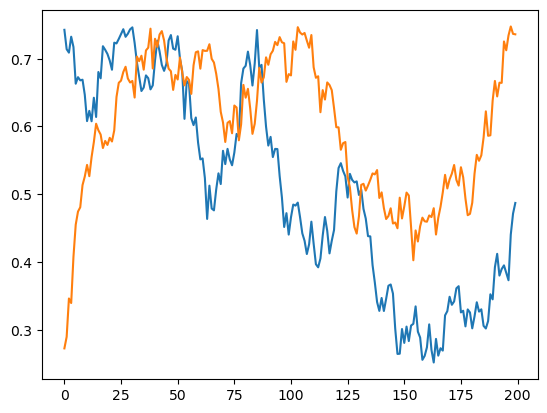

In [5]:
df_rw.loc[:, 'drift 1'].plot()
df_rw.loc[:, 'drift 2'].plot()

In [6]:
from models import *

foo = Model()

In [9]:
[x for x in dir(foo) if not x.startswith('_')]

['Q_MB',
 'Q_MF0',
 'Q_MF1',
 'Qstage2',
 'alpha',
 'get_stage1_action',
 'get_stage2_action']

In [12]:
foo.get_stage2_action(0)

AttributeError: 'Qstage2' object has no attribute 'get_beta_scaled_value'